# Errors in Sensing

Andrés Marrugo, PhD

A thermistor is used to measure temperatures between $-30^{\circ}$ and $80^{\circ}$ and produces an output voltage between 2.8 V and 1.5 V. The ideal transfer function is shown in the plot below (solid line). Because of errors, the accuracy in sensing is $\pm0.5^{\circ}$. The errors may be specified as follows:

a) In terms of the input as $\pm0.5^{\circ}$

b) As a percentange of the input span (Input Full Scale, IFS):

In [2]:
span = 80-(-30) #input span or input full scale (IFS)
e_input = 0.5 # error as input

e = (e_input/span) *100

## Error as % IFS
print 'The error as percentange of the input span is e = %2.3f %%' % (e)

The error as percentange of the input span is e = 0.455 %


c) In terms of the output span (Output Full Scale, OFS):

This may be taken off the curve as the difference shown or may be calculated by first evaluating the transfer function and its maximum and minimum limits, as shown in the plot 

The error in terms of the output is e = ± 0.0059 V
The error as percentange of the output span is e = 0.455 %


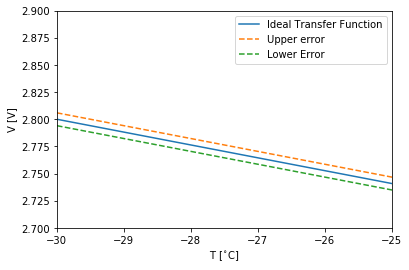

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

temp = np.array([-30,80])
volt = np.array([2.8,1.5])

# polyfit computes the coefficients a and b of degree=1
a,b = np.polyfit(temp,volt,1)

t = np.linspace(-30,80,50)
trans_f = a*t+b # linear transfer function

# Error in terms of output
e_output = np.abs(a*e_input)

print 'The error in terms of the output is e = ± %2.4f V' % (e_output)

## Error as % OFS 
out_span = 2.8-1.5
e_ofs = e_output/out_span *100

print 'The error as percentange of the output span is e = %2.3f %%' % (e_ofs)

# Error bounds
trans_f_plus = trans_f + e_output
trans_f_minus = trans_f - e_output


# Plotting
plt.plot(t,trans_f)
plt.plot(t,trans_f_plus,'--')
plt.plot(t,trans_f_minus,'--')
plt.xlabel('T [$^{\circ}$C]')
plt.ylabel('V [V]')
plt.xlim([-30,-25])
plt.ylim([2.7,2.9])
plt.legend(['Ideal Transfer Function','Upper error','Lower Error'])
plt.show()